In [81]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [82]:
path = '/Users/gms/ORF2/md_apo/results/bs_rmsd/'

filelist = os.listdir(path)

filelist.sort(reverse=False)

df = {}

i = 1

for file in filelist:
    
    print(file)

    df[i] = pd.read_table(path+file, sep=',')
    df[i] = df[i].rename(columns={"Time (ps)": "Time (ns)"})
    df[i].rename(columns={ df[i].columns[1]: "RMSD"+file }, inplace = True)
    print(i)
    i = i + 1

orf2_bs_rmsd1.csv
1
orf2_bs_rmsd2.csv
2
orf2_bs_rmsd3.csv
3
orf2_nomn_bs_rmsd1.csv
4
orf2_nomn_bs_rmsd2.csv
5
orf2_nomn_bs_rmsd3.csv
6


In [83]:
df1 = df[1]
df2 = df[2]
df3 = df[3]
df4 = df[4]
df5 = df[5]
df6 = df[6]

data_frames = [df1,df2,df3,df4,df5,df6]

In [84]:
merged = reduce(lambda  left,right: pd.merge(left,right,on=['Time (ns)'],
                                            how='outer'), data_frames)

merged = merged.dropna()

In [85]:
merged.rename(columns={ merged.columns[1]:"ORF2 En"}, inplace = True)
merged.rename(columns={ merged.columns[2]:"ORF2 En"}, inplace = True)
merged.rename(columns={ merged.columns[3]:"ORF2 En"}, inplace = True)
merged.rename(columns={ merged.columns[4]:"ORF2 En no Mn2+"}, inplace = True)
merged.rename(columns={ merged.columns[5]:"ORF2 En no Mn2+"}, inplace = True)
merged.rename(columns={ merged.columns[6]:"ORF2 En no Mn2+"}, inplace = True)

In [86]:
merged["Time (ns)"] = merged['Time (ns)']/10

In [87]:
merged

,Time (ns),ORF2 En,ORF2 En,ORF2 En,ORF2 En no Mn2+,ORF2 En no Mn2+,ORF2 En no Mn2+
0,0.00,0.001,0.001,0.001,0.000,0.000,0.001
1,0.01,0.253,0.192,0.237,0.278,0.257,0.193
2,0.02,0.286,0.198,0.228,0.244,0.240,0.167
3,0.03,0.239,0.207,0.214,0.263,0.241,0.185
4,0.04,0.263,0.176,0.219,0.264,0.229,0.175
...,...,...,...,...,...,...,...
9996,99.96,0.114,0.087,0.110,0.109,0.120,0.084
9997,99.97,0.080,0.092,0.078,0.087,0.080,0.079
9998,99.98,0.084,0.077,0.072,0.078,0.107,0.079
9999,99.99,0.009,0.009,0.009,0.009,0.009,0.010


In [88]:
merged = merged.set_index('Time (ns)')

In [89]:
sns.set(style="darkgrid")
from matplotlib import pyplot

mergedroll = merged.rolling(1).mean()

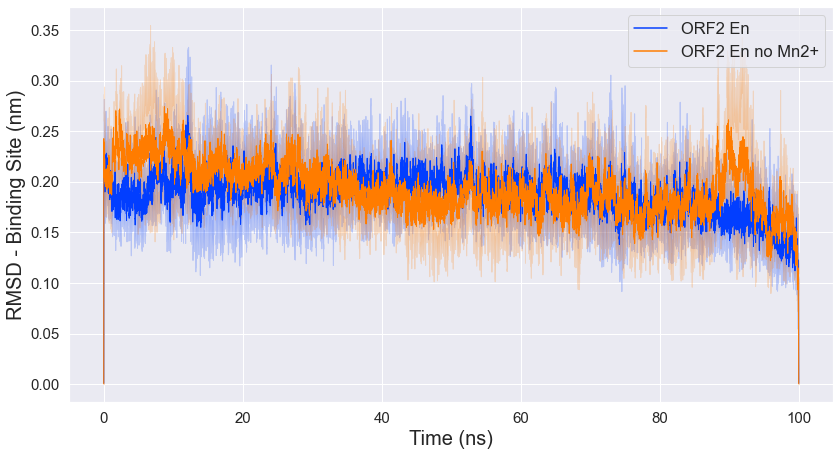

In [91]:
#mergedroll = mergedroll.dropna()


import matplotlib.ticker as ticker


a4_dims = (13.7, 7.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.lineplot(data=mergedroll, palette="bright", linewidth=1, dashes=False, ci="sd")
    #g.set(xlim = (100000,))

g.set_xlabel("Time (ns)",fontsize=20)
g.set_ylabel("RMSD - Binding Site (nm)",fontsize=20)
#g.set(ylim = (0,0.0006))
g.tick_params(labelsize=15)

#g.xaxis.set_major_locator(ticker.MultipleLocator(10))
#g.xaxis.set_major_formatter(ticker.ScalarFormatter())

